# Data parsing

In [1]:
include("import_all.jl")

ecrire_solution (generic function with 3 methods)

## Small instance

### Reading the instance

In [2]:
instance_petite = lire_instance(joinpath("..", "sujet", "petite.csv"))


Instance
   Nombre de jours: 3
   Nombre d'usines: 2
   Nombre de fournisseurs: 3
   Nombre de types d'emballages: 2
   Nombre de routes: 0

In [3]:
instance_petite.J, instance_petite.U, instance_petite.F, instance_petite.E

(3, 2, 3, 2)

In [4]:
instance_petite.L, instance_petite.γ, instance_petite.ccam, instance_petite.cstop

(13000, 1, 100, 10)

In [5]:
instance_petite.emballages

2-element Array{Emballage,1}:
 
Emballage 1
   Longueur 300
 
Emballage 2
   Longueur 200

In [6]:
instance_petite.usines

2-element Array{Usine,1}:
 
Usine 1
   Sommet 1
   Coordonnées (48.8666672, 2.3514623)
   Coûts stock [2, 4]
   Stock initial [4, 5]
   Libération journalière [5 10 0; 0 5 5]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [9 19 19; 5 10 15]
 
Usine 2
   Sommet 2
   Coordonnées (43.6044622, 1.4442469)
   Coûts stock [2, 4]
   Stock initial [3, 6]
   Libération journalière [2 2 2; 3 3 3]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [5 7 9; 9 12 15]

In [7]:
instance_petite.fournisseurs

3-element Array{Fournisseur,1}:
 
Fournisseur 1
   Sommet 3
   Coordonnées (48.8666672, 2.3514623)
   Coûts stock [2, 4]
   Coûts expédition carton [55, 30]
   Stock initial [2, 6]
   Consommation journalière [2 2 2; 1 1 1]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [0 0 0; 5 4 3]
 
Fournisseur 2
   Sommet 4
   Coordonnées (45.7578137, 4.8320114)
   Coûts stock [2, 4]
   Coûts expédition carton [45, 40]
   Stock initial [4, 5]
   Consommation journalière [0 0 0; 2 2 2]
   Stock maximal journalier [5 6 3; 4 4 4]
   Stock journalier [4 4 4; 3 1 0]
 
Fournisseur 3
   Sommet 5
   Coordonnées (45.7578137, 4.8320114)
   Coûts stock [2, 4]
   Coûts expédition carton [35, 50]
   Stock initial [7, 4]
   Consommation journalière [3 3 3; 0 0 0]
   Stock maximal journalier [5 5 5; 5 5 5]
   Stock journalier [4 1 0; 4 4 4]

In [8]:
instance_petite.d

5×5 Array{Int64,2}:
  0  10  0  8  8
 10   0  8  5  5
  0   8  0  8  8
  8   5  8  0  0
  8   5  8  0  0

In [9]:
instance_petite.routes

Route[]

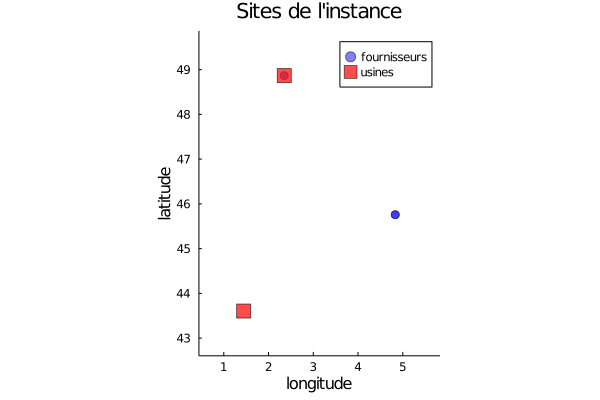

In [10]:
plot_sites(instance_petite)

In [11]:
plot_folium(instance_petite, include_routes=true, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x7f8a70def280>

### Reading the solution

In [12]:
sol_petite = lire_solution(joinpath("..", "sujet", "petite.txt"))

Solution contenant 3 routes

Route
   Jour 1
   Nb de camions 1
   Usine de départ 1
   Nb d'arrêts 1
   Stop 1
      Fournisseur 1
      Livraison [0, 2]
Route
   Jour 2
   Nb de camions 1
   Usine de départ 1
   Nb d'arrêts 3
   Stop 1
      Fournisseur 1
      Livraison [1, 1]
   Stop 2
      Fournisseur 2
      Livraison [1, 1]
   Stop 3
      Fournisseur 3
      Livraison [1, 1]
Route
   Jour 2
   Nb de camions 2
   Usine de départ 2
   Nb d'arrêts 2
   Stop 1
      Fournisseur 2
      Livraison [3, 1]
   Stop 2
      Fournisseur 3
      Livraison [0, 1]

In [13]:
instance_petite_resolue = instance_resolue(instance_petite, sol_petite)


Instance
   Nombre de jours: 3
   Nombre d'usines: 2
   Nombre de fournisseurs: 3
   Nombre de types d'emballages: 2
   Nombre de routes: 3

### Analyzing the solution

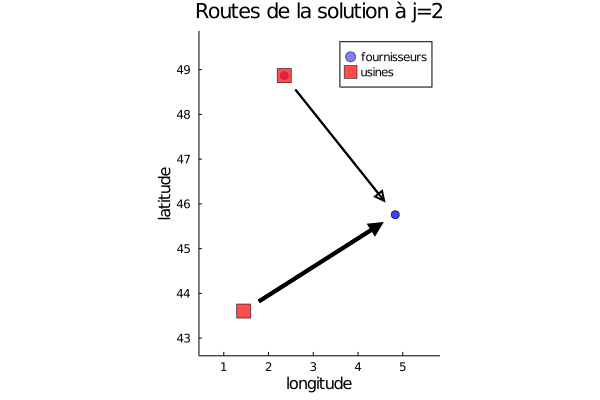

In [14]:
plot_routes(instance_petite_resolue, j=2)

In [37]:
plot_folium(instance_petite_resolue, include_routes=true, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x7f8a59c18b50>

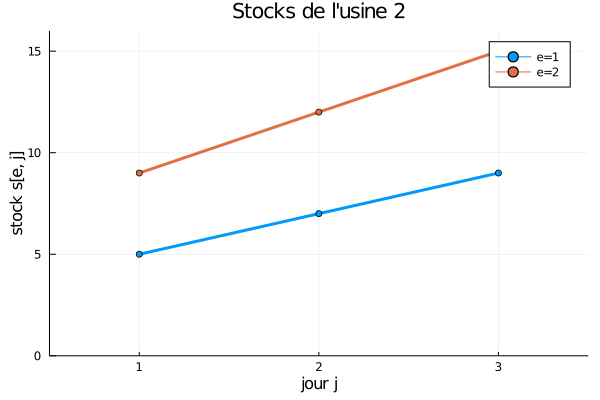

In [16]:
plot_stocks(instance_petite.usines[2])

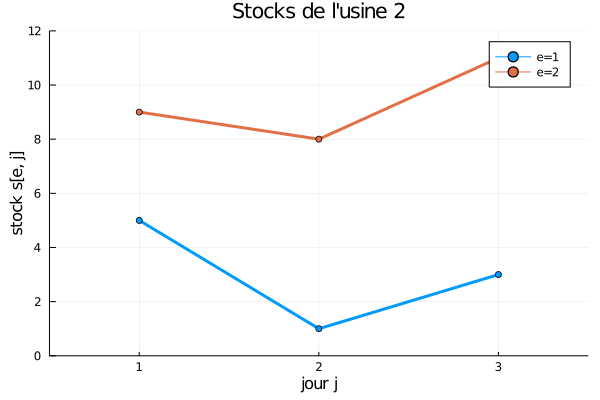

In [17]:
plot_stocks(instance_petite_resolue.usines[2])

In [18]:
faisabilite(instance_petite_resolue)

true

In [19]:
cout(instance_petite)

552

In [20]:
cout(instance_petite_resolue)

884

In [21]:
cout(instance_petite_resolue, details=1)


2 usines, 3 fournisseurs, 3 routes
Cout stock usines : 124 soit 62.0 par usine
Cout stock fournisseurs : 62 soit 20.666666666666668 par fournisseur
Cout cartons fournisseurs : 200 soit 66.66666666666667 par fournisseur
Cout camion routes : 300 soit 100.0 par route
Cout etapes routes : 60 soit 20.0 par route
Cout kms routes : 13 soit 4.333333333333333 par route
Cout total : 759


759

In [22]:
cout(instance_petite_resolue, details=2)


2 usines, 3 fournisseurs, 3 routes

Usine 1
   Jour 1
      Coût stock: 8
   Jour 2
      Coût stock: 22
   Jour 3
      Coût stock: 42
Usine 2
   Jour 1
      Coût stock: 16
   Jour 2
      Coût stock: 12
   Jour 3
      Coût stock: 24

Fournisseur 1
   Jour 1
      Coût stock: 8
      Coût expédition: 0
      Coût total: 8
   Jour 2
      Coût stock: 8
      Coût expédition: 110
      Coût total: 118
   Jour 3
      Coût stock: 4
      Coût expédition: 55
      Coût total: 59
Fournisseur 2
   Jour 1
      Coût stock: 0
      Coût expédition: 0
      Coût total: 0
   Jour 2
      Coût stock: 10
      Coût expédition: 0
      Coût total: 10
   Jour 3
      Coût stock: 16
      Coût expédition: 0
      Coût total: 16
Fournisseur 3
   Jour 1
      Coût stock: 0
      Coût expédition: 0
      Coût total: 0
   Jour 2
      Coût stock: 8
      Coût expédition: 0
      Coût total: 8
   Jour 3
      Coût stock: 8
      Coût expédition: 35
      Coût total: 43

Route 1 - jour 1, usine 1
   Co

884

### Text output

In [23]:
ecrire_instance(instance_petite, joinpath("..", "sujet", "petite_copy.csv"))

true

In [24]:
s1 = open(joinpath("..", "sujet", "petite.csv")) do file1
    read(file1, String)
end

s2 = open(joinpath("..", "sujet", "petite_copy.csv")) do file2
    read(file2, String)
end

s1 == s2

true

In [25]:
ecrire_solution(sol_petite, joinpath("..", "sujet", "petite_copy.txt"))

true

In [26]:
s1 = open(joinpath("..", "sujet", "petite.txt")) do file1
    read(file1, String)
end

s2 = open(joinpath("..", "sujet", "petite_copy.txt")) do file2
    read(file2, String)
end

s1 == s2

true

## Real instance

In [2]:
instance_europe = lire_instance("C:/User/Wael/Desktop/Projets")

LoadError: SystemError: opening file "..\\sujet\\europe.csv": No such file or directory

In [28]:
cout(instance_europe)

41777761

In [29]:
cout(instance_europe, details=1)


25 usines, 576 fournisseurs, 0 routes
Cout stock usines : 31791671 soit 1.27166684e6 par usine
Cout stock fournisseurs : 0 soit 0.0 par fournisseur
Cout cartons fournisseurs : 9986090 soit 17336.961805555555 par fournisseur
Cout total : 41777761


41777761

### Smaller instances

In [30]:
instance_france = reduire(instance_europe, countrycode = "FRA")


Instance
   Nombre de jours: 21
   Nombre d'usines: 14
   Nombre de fournisseurs: 184
   Nombre de types d'emballages: 27
   Nombre de routes: 0

In [31]:
plot_folium(instance_france, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x7f8a58551d90>

In [32]:
instance_espagne = reduire(instance_europe, countrycode = "ESP")


Instance
   Nombre de jours: 21
   Nombre d'usines: 6
   Nombre de fournisseurs: 113
   Nombre de types d'emballages: 27
   Nombre de routes: 0

In [33]:
plot_folium(instance_espagne, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x7f8a59b72dc0>

In [34]:
instance_maroc = reduire(instance_europe, countrycode = "MAR")


Instance
   Nombre de jours: 21
   Nombre d'usines: 2
   Nombre de fournisseurs: 12
   Nombre de types d'emballages: 27
   Nombre de routes: 0

In [35]:
plot_folium(instance_maroc, include_fournisseurs=true)

PyObject <folium.folium.Map object at 0x7f8a59af8520>

In [36]:
ecrire_instance(instance_france, joinpath("..", "sujet", "france.csv"))
ecrire_instance(instance_espagne, joinpath("..", "sujet", "espagne.csv"))
ecrire_instance(instance_maroc, joinpath("..", "sujet", "maroc.csv"))

true